Copyright (c) 2018 [Geosoft Inc.](geosoft.com)

https://github.com/GeosoftInc/gxpy/blob/master/README.md

[BSD 2-clause License](https://github.com/GeosoftInc/gxpy/blob/master/LICENSE)

#  Tilt Depth

The depth to magnetic sources from the edges of magnetic features can be determined from the reciprocal of the gradient of the tilt angle at the zero-crossover.  The `geosoft.gxpy.grid_utility.tilt_depth` makes this calculation and returns a set of (x, y, z) locations that represent magnetic depth.

Reference: [Salem et al, 2008, Interpretation of magnetic data using tilt-angle derivatives](https://www.researchgate.net/publication/236873389_Interpretation_of_magnetic_data_using_tilt-angle_derivatives)

The procedure implemented in Geosoft follows a process developed by Blakely, 2016.

 1. [TMI Grid](#TMI-Grid)
 2. [Calculate the depth from the tilt-angle and tilt-derivative](#Calculate the depth from the tilt-angle and tilt-derivative)
 3. [Plot depths as coloured symbols](#Plot-depths-as-coloured-symbols)

## TMI Grid

This is Total Magnetic Intensity (TMI) data from the Black Hills Norite in South Australia.

Reference: https://doi.org/10.1071/ASEG2016ab115

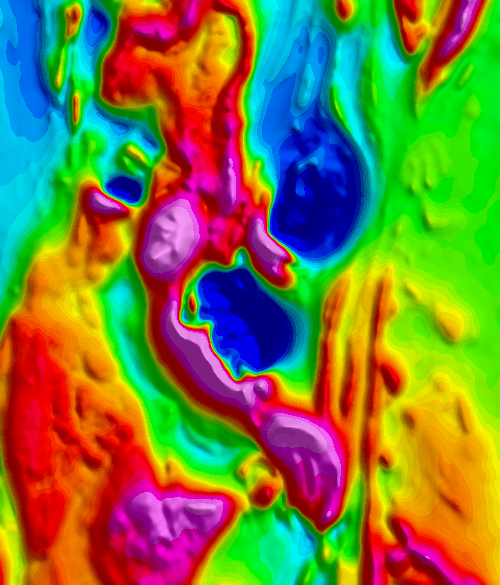

In [1]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.utility as gxu
import geosoft.gxpy.grid as gxgrd
import geosoft.gxpy.grid_utility as gxgrdu
import geosoft.gxpy.map as gxmap
import geosoft.gxpy.view as gxview
import geosoft.gxpy.group as gxgrp
import numpy as np

from IPython.display import Image

gxc = gx.GXpy()
gxu.check_version('9.4.0b0')

# get the sample data from github
url = 'https://github.com/GeosoftInc/gxpy/raw/master/examples/data/'
grid = 'bhn_tmi_250m.grd'
gxu.url_retrieve(url + grid)
gxu.url_retrieve(url + grid + '.gi')
gxu.url_retrieve(url + grid + '.xml')

grd = gxgrd.Grid.open(grid)
Image(grd.image_file(shade=True, pix_width=500))

## Calculate the depth from the tilt-angle and tilt-derivative

The depth is the reciprocal of the horizontal gradient at the zero-contour of the tilt-angle.

In [2]:
td_pp = gxgrdu.tilt_depth(grd)

## Plot depths as coloured symbols

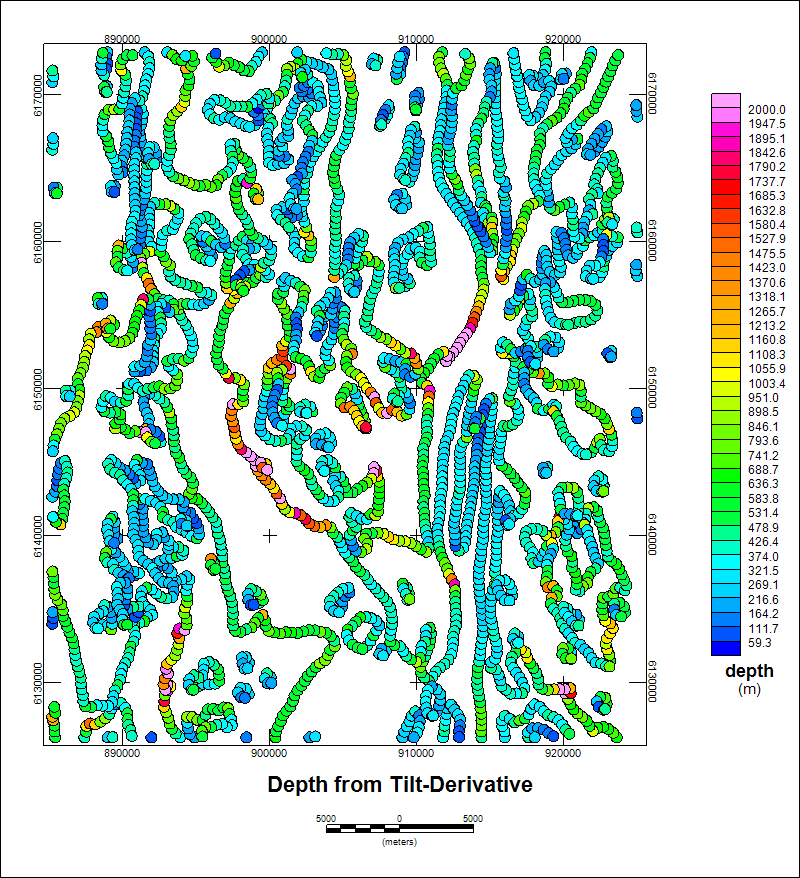

In [3]:
with gxmap.Map.figure(td_pp.extent_xy, 
                      title='Depth from Tilt-Derivative',
                      margins=(1, 3.5, 3, 1)) as gmap:
    map_file = gmap.file_name
    with gxview.View.open(gmap, "data") as v:
        cmap = gxgrp.Color_map(title='depth', 
                               unit_of_measure=td_pp.coordinate_system.unit_of_measure)
        depths = td_pp.pp[:,2]
        depths = depths[~np.isnan(depths)]
        cmap.set_linear(np.min(depths), 2000)  # np.max(depths))
        gxgrp.Color_symbols_group.new(v, 'tilt-depth', td_pp.pp, cmap)
        
        gxgrp.legend_color_bar(v, 'depth_legend', cmap=cmap)

Image(gxmap.Map.open(map_file).image_file(pix_width=800))